Note: 学生の皆様へ。このノートブックを色々と編集して実行する場合は、各自のホームディレクトリへコピーしてから行ってください。

## 3つの分布を有する高次元データを生成する関数の定義

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler  # または MinMaxScaler

random_seed = 42 # 乱数のシード値 (42 はしばしば使われるマジックナンバー、おまじない)

# 主要次元をn_principal_features個有し、かつ、3つのクラスタを持つ n_total_dim 次元のデータを生成する関数、主要次元以外は乱数から成るノイズ次元を追加
def generate_data(n_principal_features, n_samples, n_total_dim):
    centers = [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]
    features, labels = make_blobs(n_samples=n_samples, centers=centers, n_features=n_principal_features, random_state=random_seed, cluster_std=0.005)
    
    # ノイズ次元として、0を中心とするガウス分布の次元を n_noise_features 個追加
    n_gaussian_features = n_total_dim - n_principal_features
    gaussian_noise = np.random.normal(loc=0, scale=1, size=(n_samples, n_gaussian_features))
    features = np.hstack([features, gaussian_noise])

    # 特徴量を規格化
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    
    return features, labels


## 主要3次元のプロットで生成データが意図どおりに生成できていることを確認

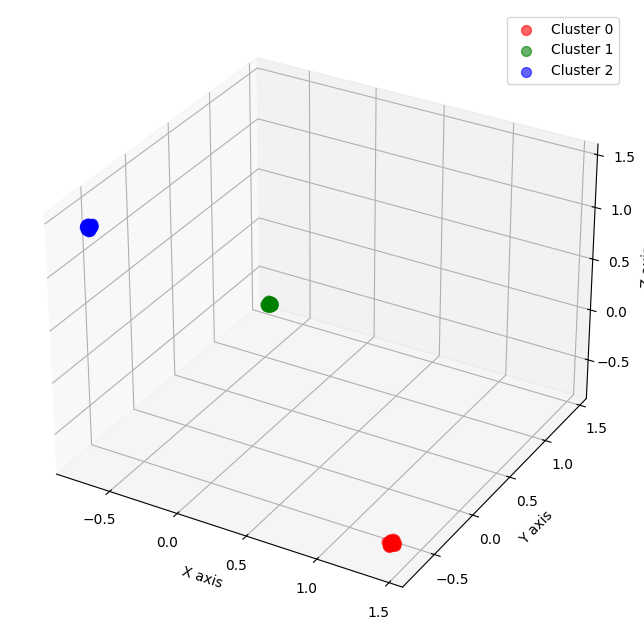

In [2]:
import matplotlib.pyplot as plt

# 前のセルの関数を用いて生成された3次元データの散布図を作成してみる
n_principal_features = 3 # 主要次元数
n_samples = 500 # データ点数
features, labels = generate_data(n_principal_features, n_samples, 3)

# 3次元散布図の作成
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 各クラスタに対して色を変えてプロット
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    ax.scatter(features[labels == i][:, 0], features[labels == i][:, 1], features[labels == i][:, 2], c=color, label=f'Cluster {i}', s=50, alpha=0.6)

#ax.set_xlim([0, 1])
#ax.set_ylim([0, 1])
#ax.set_zlim([0, 1])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()

plt.show()


## 次元の呪いがかかる様子を観察してみる

This is toorPIA Utility. The following functions are available.
    edit_params(working_dir): edit parameters
    edit_type_weight():     create & edit type_weight.csv for table type data
    create_basemap():         create a basemap
    addplot():                addplot to basename in current working_dir
    show_params():            show current settings of parameters
    load_params(working_dir): return parameters saved in working_dir


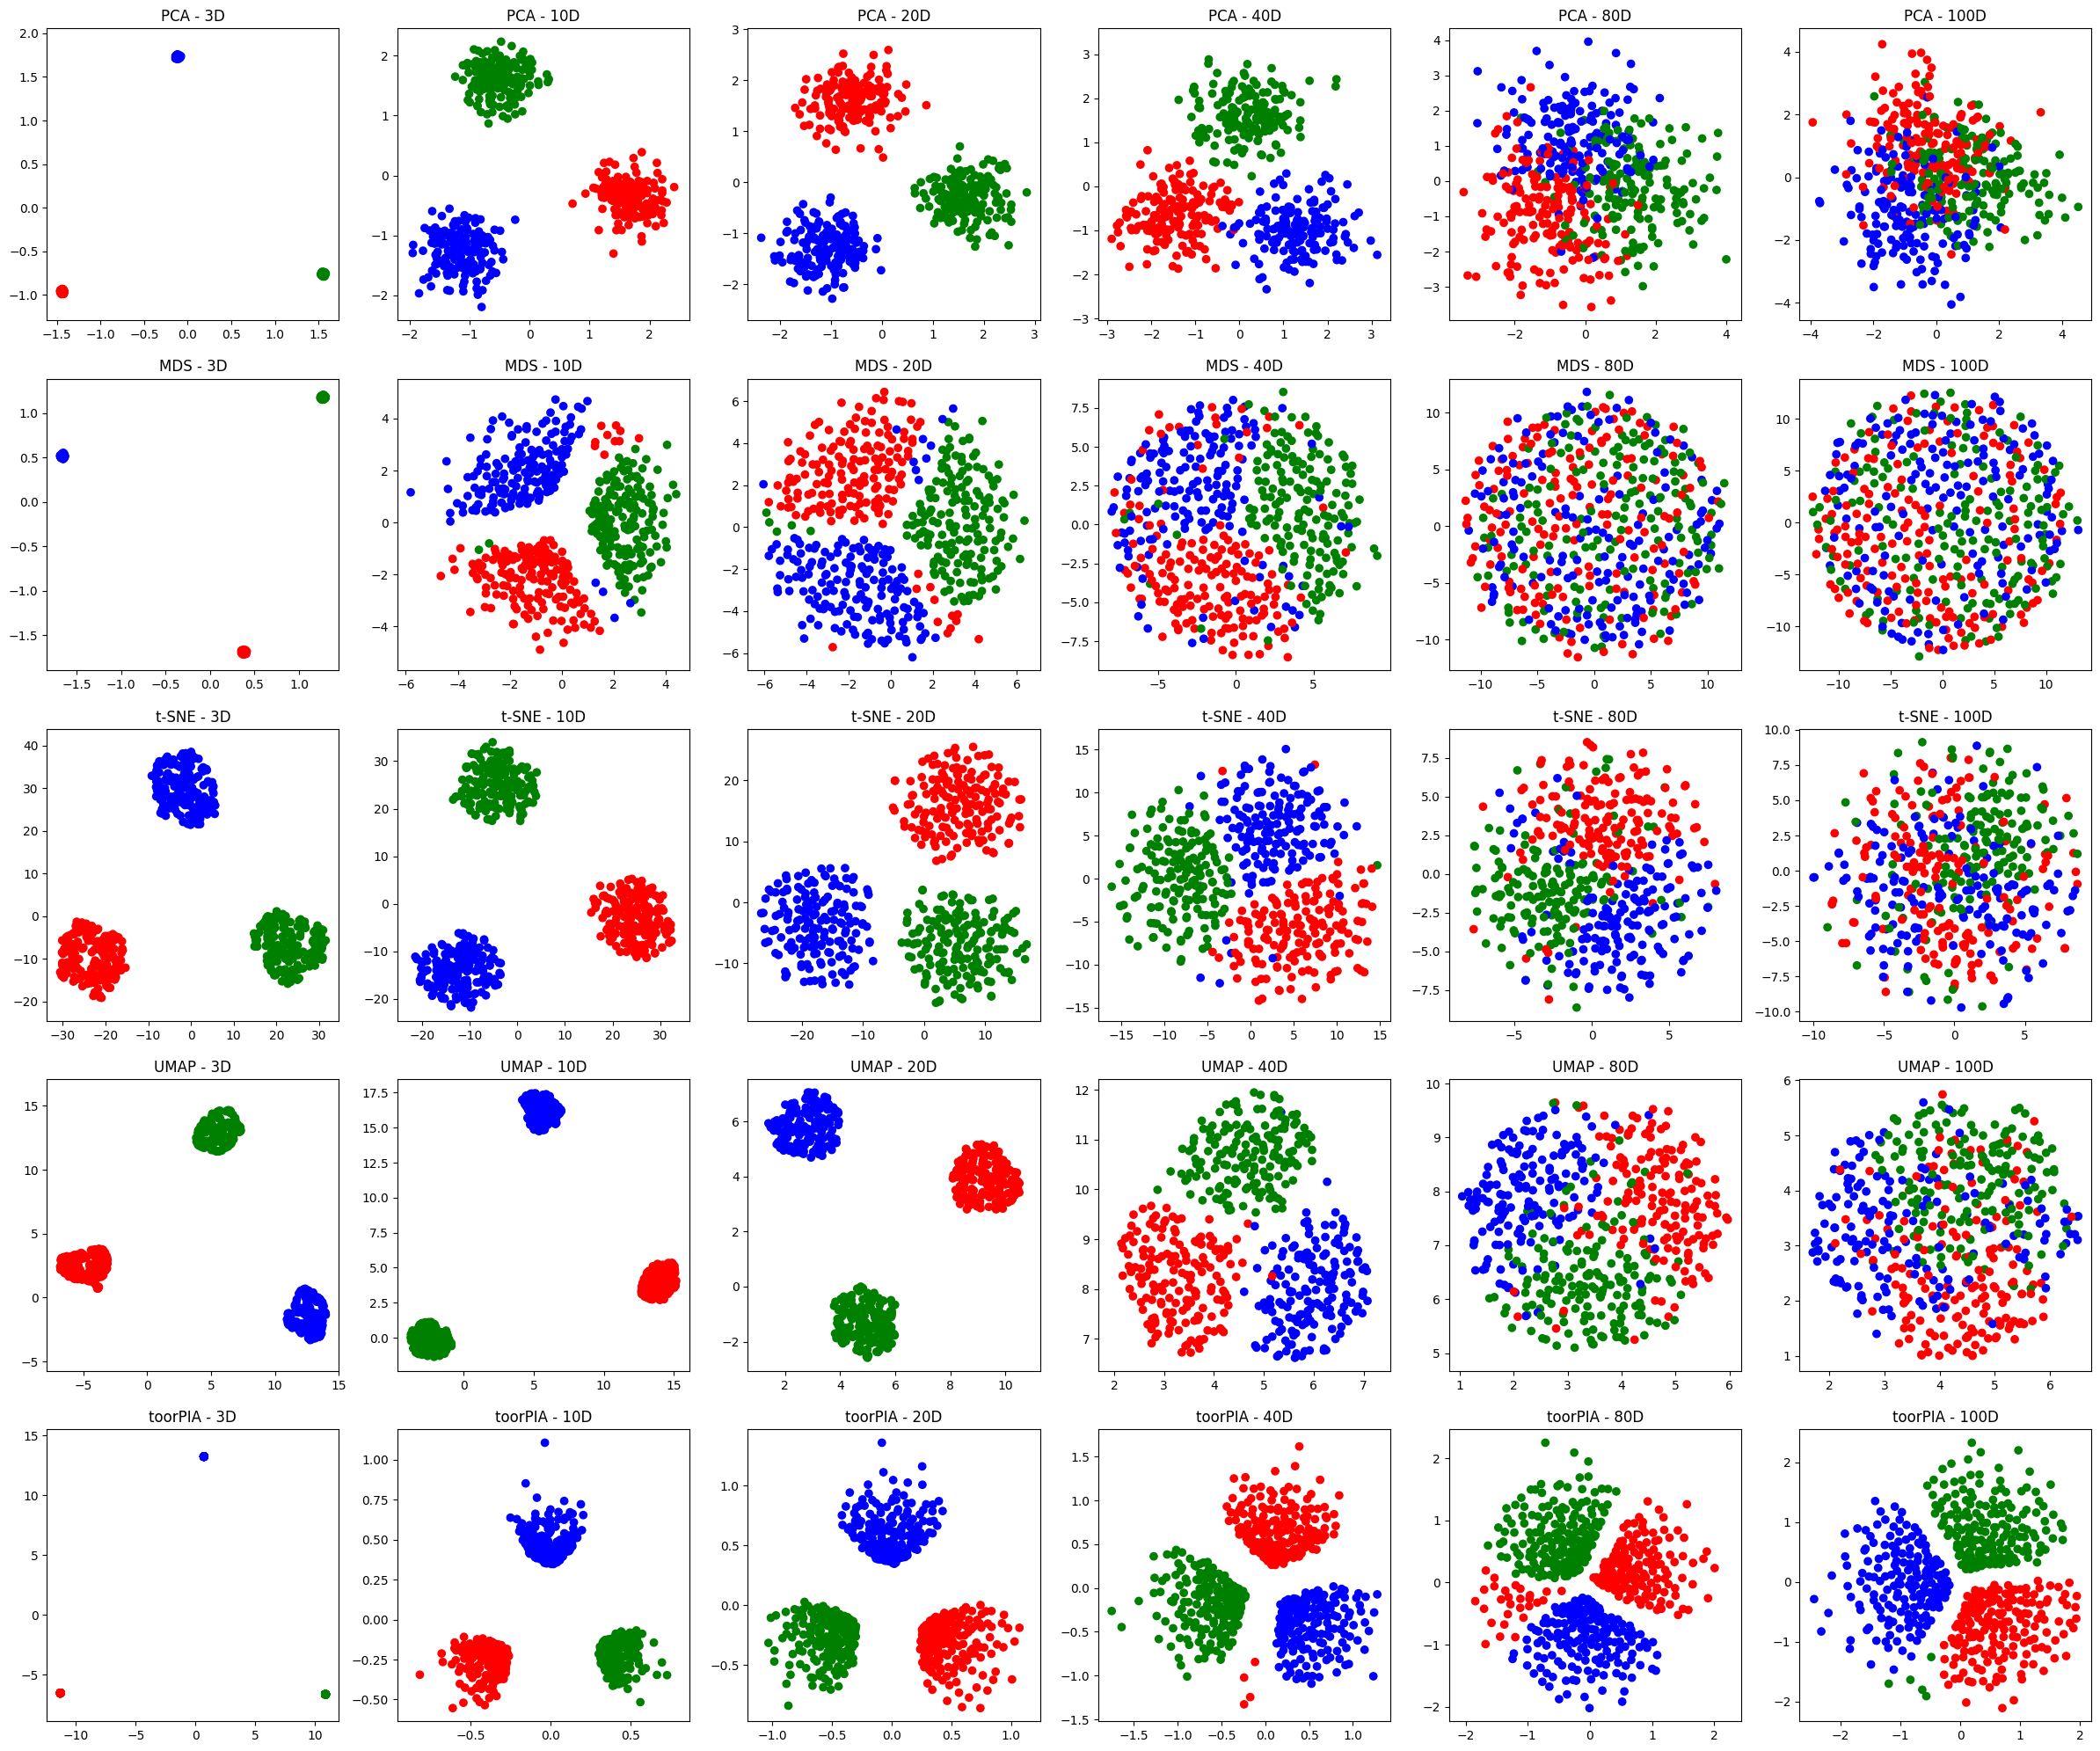

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import umap
import numpy as np
import toorpia.utils as toorpia

np.random.seed(random_seed)  # 乱数のシード値を設定(結果の再現性のため)

# テストする解析手法とその関数
methods = {
    "PCA": PCA(n_components=2, random_state=random_seed),
    "MDS": MDS(n_components=2, random_state=random_seed, normalized_stress='auto'),
    "t-SNE": TSNE(n_components=2, random_state=random_seed),
    "UMAP": umap.UMAP(n_components=2, random_state=random_seed, n_jobs=1),
    "toorPIA": toorpia,
}

# テストする次元数
dimensions = [3, 10, 20, 40, 80, 100] # ノイズ次元を追加して最終的に何次元にするか

# サブプロットオブジェクト
fig_width = len(dimensions) * 5
fig_height = len(methods) * 5
fig, axs = plt.subplots(len(methods), len(dimensions), figsize=(fig_width, fig_height))

# methodsが1種類の場合、axsを2次元配列に変換
if len(methods) == 1:
    axs = [axs]

# ラベルの色
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# 各次元毎に解析を実施し、結果をプロット
for idx, dimension in enumerate(dimensions):
    features, labels = generate_data(n_principal_features, n_samples, dimension)
    label_colors = [colors[i] for i in labels.astype(int)]

    for row_idx, (method_name, method) in enumerate(methods.items()):
        if method_name == 'toorPIA':
            features_transformed = method.fit_transform(features, vector_normalization=False)
        else:
            features_transformed = method.fit_transform(features)
        axs[row_idx][idx].scatter(features_transformed[:, 0], features_transformed[:, 1], c=label_colors)

        x_center, y_center = np.mean(axs[row_idx][idx].get_xlim()), np.mean(axs[row_idx][idx].get_ylim())
        x_range = max(axs[row_idx][idx].get_xlim()) - min(axs[row_idx][idx].get_xlim())
        y_range = max(axs[row_idx][idx].get_ylim()) - min(axs[row_idx][idx].get_ylim())
        range_val = max(x_range, y_range) / 2.0

        axs[row_idx][idx].set_xlim(x_center - range_val, x_center + range_val)
        axs[row_idx][idx].set_ylim(y_center - range_val, y_center + range_val)
        axs[row_idx][idx].set_title(f'{method_name} - {dimension}D')


#plt.tight_layout()
plt.show()


## ノイズ次元の影響を受けにくい新しい高次元解析手法の例: toorPIA


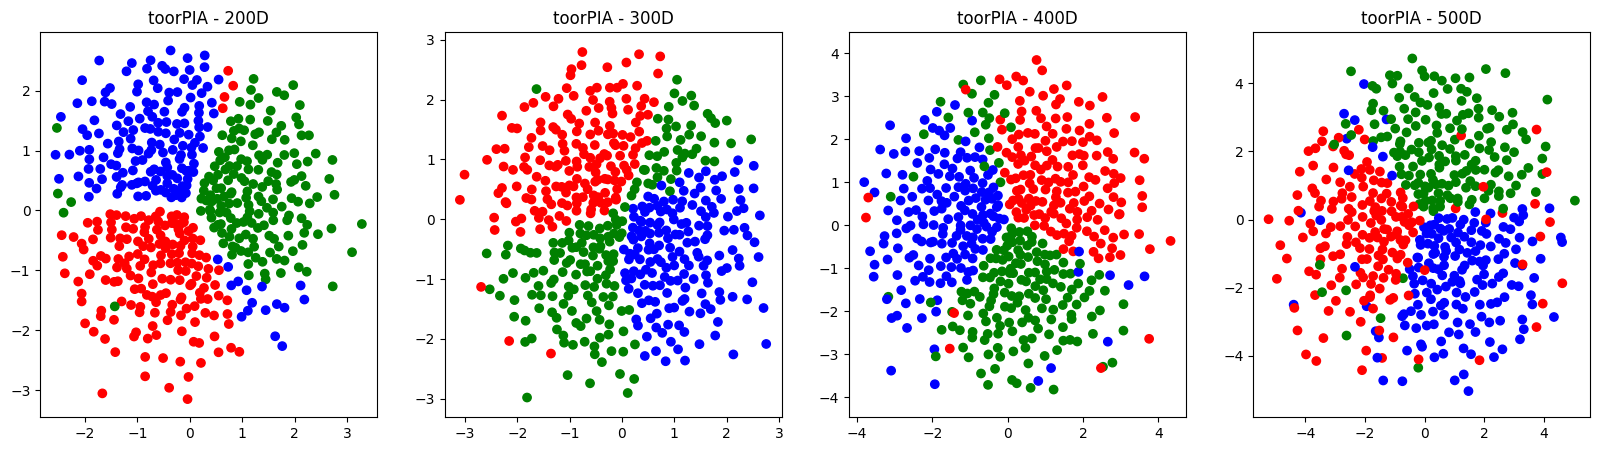

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import umap
import numpy as np
import toorpia.utils as toorpia

np.random.seed(random_seed)  # 乱数のシード値を設定(結果の再現性のため)

# テストする解析手法とその関数
methods = {
    "toorPIA": toorpia,
}

# テストする次元数
dimensions = [200, 300, 400, 500] # ノイズ次元を追加して最終的に何次元にするか

# サブプロットオブジェクト
fig_width = len(dimensions) * 5
fig_height = len(methods) * 5
fig, axs = plt.subplots(len(methods), len(dimensions), figsize=(fig_width, fig_height))

# methodsが1種類の場合、axsを2次元配列に変換
if len(methods) == 1:
    axs = [axs]

# ラベルの色
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# 各次元毎に解析を実施し、結果をプロット
for idx, dimension in enumerate(dimensions):
    features, labels = generate_data(n_principal_features, n_samples, dimension)
    label_colors = [colors[i] for i in labels.astype(int)]

    for row_idx, (method_name, method) in enumerate(methods.items()):
        if method_name == 'toorPIA':
            features_transformed = method.fit_transform(features, vector_normalization=False)
        else:
            features_transformed = method.fit_transform(features)
        axs[row_idx][idx].scatter(features_transformed[:, 0], features_transformed[:, 1], c=label_colors)

        x_center, y_center = np.mean(axs[row_idx][idx].get_xlim()), np.mean(axs[row_idx][idx].get_ylim())
        x_range = max(axs[row_idx][idx].get_xlim()) - min(axs[row_idx][idx].get_xlim())
        y_range = max(axs[row_idx][idx].get_ylim()) - min(axs[row_idx][idx].get_ylim())
        range_val = max(x_range, y_range) / 2.0

        axs[row_idx][idx].set_xlim(x_center - range_val, x_center + range_val)
        axs[row_idx][idx].set_ylim(y_center - range_val, y_center + range_val)
        axs[row_idx][idx].set_title(f'{method_name} - {dimension}D')


#plt.tight_layout()
plt.show()
